Q.1.

Ans

The fundamental idea behind ensemble techniques is to combine multiple individual (weak) models to create a stronger, more robust model.
The goal is to reduce variance, bias, or improve predictions by leveraging the diversity of multiple models.

    Bagging (Bootstrap Aggregation)

Trains several independent models in parallel on different random subsets (bootstrapped samples) of the training data.

Aggregates their outputs (by averaging or voting).

Objective: Reduce variance and prevent overfitting.

Example: Random Forest.

    Boosting

Trains models sequentially, each new model focusing on correcting the errors of the previous one.

Objective: Reduce bias and build a strong model from many weak learners.

Example: AdaBoost, Gradient Boosting, XGBoost.

Q.2.

Ans

A single decision tree tends to overfit because it can memorize training data.
Random Forest combats this by creating many decision trees trained on random subsets of:

- Data (row sampling)

- Features (column sampling)

This randomness makes trees less correlated, and averaging their predictions reduces overfitting.

Two key hyperparameters:

1. n_estimators — Number of trees in the forest.

More trees = better averaging, lower variance.

2. max_features — Number of features considered for each split.

Smaller values = more diverse trees, reducing overfitting.

Q.3.

Ans

Stacking combines multiple base learners (like Decision Tree, KNN, SVM) and trains a meta-model (like Logistic Regression) to learn the best way to combine their predictions.

How it differs:

- Bagging/Boosting combine models of the same type and aggregate predictions directly (averaging or weighting).

- Stacking combines different model types, using another model to learn the optimal combination.

Example Use Case:
Predicting loan defaults:

- Base models: Random Forest, Logistic Regression, SVM

- Meta-model: XGBoost combines their outputs for final prediction.

Q.4

Ans

Each tree in a Random Forest is trained on a bootstrap sample (a random subset of training data with replacement).
The remaining data (~1/3 of samples) not used for training that tree are called Out-of-Bag samples.

- The OOB Score is the average prediction accuracy on these unused samples.

- It provides a built-in cross-validation measure, meaning you can estimate model performance without needing a separate validation set.

Q.5.

Ans

How they handle errors from weak learners

    AdaBoost (Adaptive Boosting):

Focus on Misclassified Instances: AdaBoost focuses on the individual training instances themselves. In each iteration, it increases the weights of instances that were misclassified by the previous weak learner and decreases the weights of those that were classified correctly.
Subsequent Learner Training: The next weak learner is trained specifically to perform well on these re-weighted instances (the "hard examples"), thereby attempting to correct the errors of its predecessors. The error handling is direct and instance-specific.

    Gradient Boosting (GB):

Focus on Pseudo-Residuals (Errors):

 Gradient Boosting focuses on the errors (residuals) made by the entire current ensemble model (the sum of all previously added learners) rather than individual data points.

    Subsequent Learner Training:
 Each new weak learner is trained to predict the negative gradient of the loss function with respect to the current ensemble's predictions. In simple terms, for common loss functions like mean squared error, this means the new learner is trained to predict the residual errors themselves. The subsequent learners are not trained on a re-weighted dataset but on a modified target variable that represents the collective error the existing model has yet to capture.

 Weight adjustment mechanism

 AdaBoost:

 Instance Weights and Learner Weights:
  AdaBoost involves two types of weight adjustments:
  - Instance Weights: As mentioned above, these are updated based on misclassification, making the next learner focus on hard examples.
  - Learner Weights (\(\alpha _{t}\)): Each weak learner in the final ensemble is assigned a weight based on its overall accuracy on the weighted training data. More accurate learners receive higher weights in the final combination.Mechanism: Weights are updated using an exponential loss function, often derived from a simple misclassification rate calculation.


Q.6.

Ans

CatBoost natively handles categorical features without manual encoding (like One-Hot or Label Encoding).

How it works:

Converts categorical values into numerical form using target-based statistics (like mean target value per category).

Uses ordered target encoding to avoid target leakage (based on data order).

Supports efficient oblivious trees (symmetric trees) that speed up training.

Thus, it performs well on categorical data with minimal preprocessing.

Q.7.

Ans



In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load dataset
data = load_wine()
X, y = data.data, data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling:\n", classification_report(y_test, y_pred))

# 4. Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Scaling:\n", classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
best_knn = grid.best_estimator_

# 6. Compare final model
y_pred_best = best_knn.predict(X_test_scaled)
print("Optimized Model:\n", classification_report(y_test, y_pred_best))


Without Scaling:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

With Scaling:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Params: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized Model:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00

Q.8.

Ans



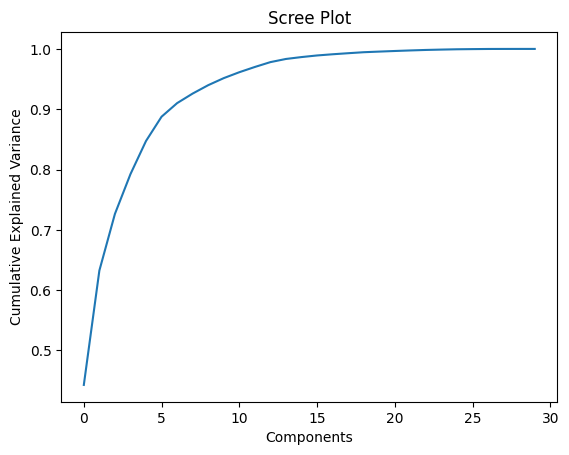

Accuracy (Original): 0.9806678383128296
Accuracy (PCA 95%): 0.9753954305799648


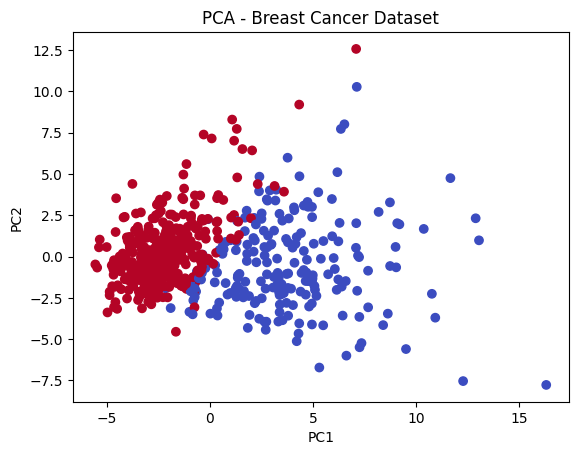

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Standardize
X_scaled = StandardScaler().fit_transform(X)

# 3. PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# 4. Retain 95% variance
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)

# 5. Train KNN on both datasets
knn = KNeighborsClassifier(n_neighbors=5)
acc_original = accuracy_score(y, knn.fit(X_scaled, y).predict(X_scaled))
acc_pca = accuracy_score(y, knn.fit(X_pca, y).predict(X_pca))
print("Accuracy (Original):", acc_original)
print("Accuracy (PCA 95%):", acc_pca)

# 6. Scatter Plot (First 2 Components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA - Breast Cancer Dataset')
plt.show()


Q.9.

Ans



Euclidean MSE: 4803.906
Manhattan MSE: 5210.226


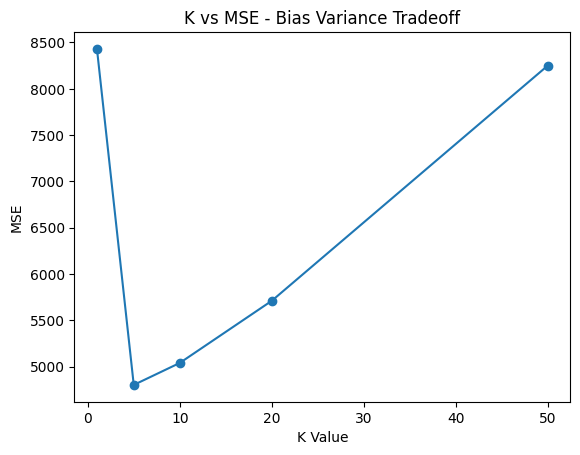

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare distance metrics
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    mse = mean_squared_error(y_test, knn.predict(X_test))
    print(f"{metric.capitalize()} MSE: {mse:.3f}")

# Bias-variance analysis
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    mse_values.append(mean_squared_error(y_test, knn.predict(X_test)))

plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K Value'); plt.ylabel('MSE')
plt.title('K vs MSE - Bias Variance Tradeoff')
plt.show()


Q.10.

Ans

BRUTE: Accuracy=0.719, Time=0.004s
KD_TREE: Accuracy=0.719, Time=0.008s
BALL_TREE: Accuracy=0.719, Time=0.008s


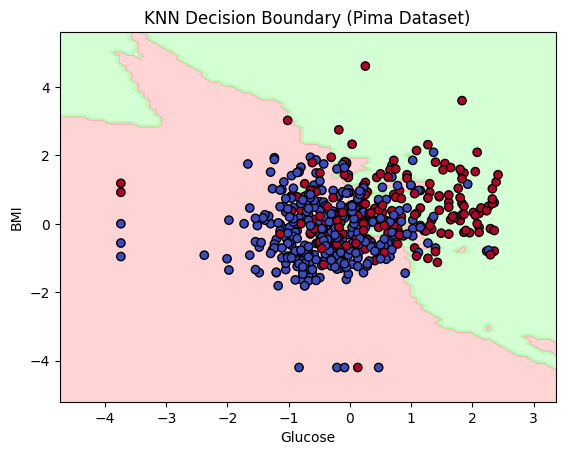

In [4]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
df = pd.read_csv(url, names=cols)

# Handle missing values
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Compare algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
for algo in algorithms:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()
    print(f"{algo.upper()}: Accuracy={accuracy_score(y_test, y_pred):.3f}, Time={end-start:.3f}s")

# Plot decision boundary (using 2 features)
from matplotlib.colors import ListedColormap
import numpy as np

features = [1, 5]  # e.g., Glucose & BMI
X_plot = X_train[:, features]
knn_best = KNeighborsClassifier(n_neighbors=5).fit(X_plot, y_train)
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
plt.xlabel('Glucose'); plt.ylabel('BMI')
plt.title('KNN Decision Boundary (Pima Dataset)')
plt.show()


 ------------------------------------